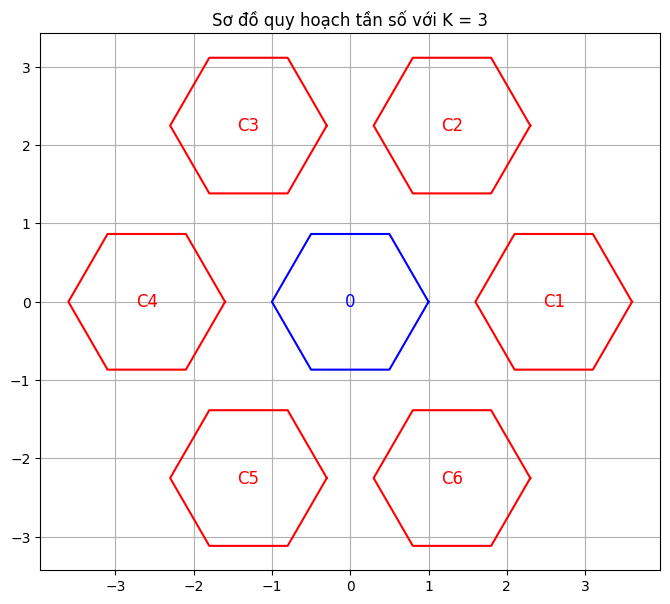

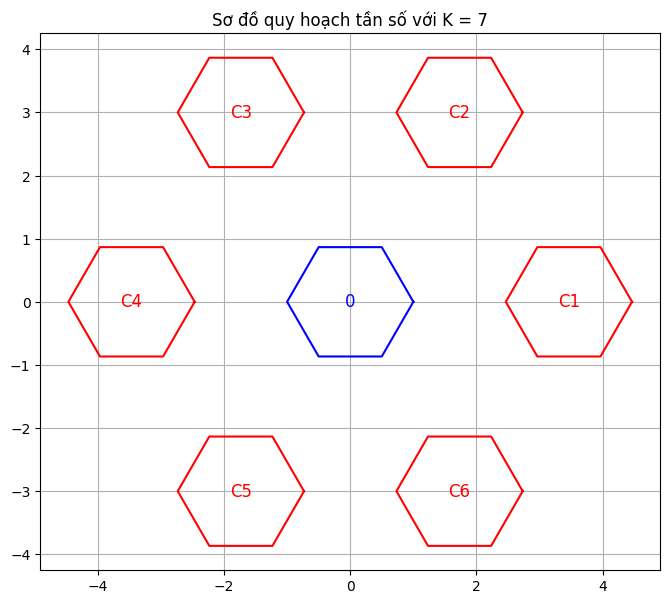

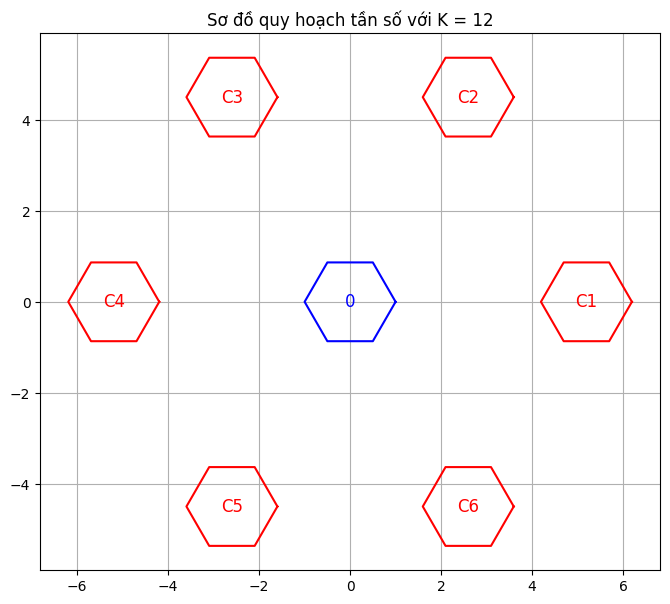

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_hexagon(x, y, size=1, color='k'):
    """Hàm vẽ 1 cell hình lục giác"""
    angles = np.linspace(0, 2 * np.pi, 7)
    x_hex = x + size * np.cos(angles)
    y_hex = y + size * np.sin(angles)
    plt.plot(x_hex, y_hex, color)

def calculate_cell_positions(K):
    """Tính vị trí các cell đồng kênh dựa theo K"""
    positions = []
    # Tìm (i, j) thỏa mãn K = i^2 + i*j + j^2
    found = False
    for i in range(0, K+1):
        for j in range(0, K+1):
            if K == i**2 + i*j + j**2:
                found = True
                break
        if found:
            break
    if not found:
        print(f"Không tìm được (i, j) thỏa mãn K = {K}")
        return []

    # Cell trung tâm tại (0,0)
    dx = np.sqrt(3) * (i + j/2)
    dy = 3/2 * j
    # Tạo 6 cell đồng kênh quanh trung tâm
    angles = np.linspace(0, 2*np.pi, 7)[:-1]
    for angle in angles:
        x = dx * np.cos(angle)
        y = dx * np.sin(angle)
        positions.append((x, y))
    return positions

def plot_cells(K):
    plt.figure(figsize=(8, 8))
    plt.title(f"Sơ đồ quy hoạch tần số với K = {K}")
    # Cell trung tâm
    plot_hexagon(0, 0, color='b')
    plt.text(0, 0, '0', ha='center', va='center', fontsize=12, color='b')

    # Cell đồng kênh
    positions = calculate_cell_positions(K)
    for idx, (x, y) in enumerate(positions):
        plot_hexagon(x, y, color='r')
        plt.text(x, y, f'C{idx+1}', ha='center', va='center', fontsize=12, color='r')

    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.show()

# Chạy cho các giá trị K = 3, 7, 12
for K in [3, 7, 12]:
    plot_cells(K)


In [4]:
import numpy as np

def calculate_SIR(K, n=4):
    R = 1  # Giả sử bán kính cell chuẩn hóa = 1
    D = R * np.sqrt(3 * K)  # Khoảng cách tái sử dụng

    # Với mô hình đơn giản, giả sử 6 cell lân cận gần nhất gây nhiễu
    N = 6

    interference = N * (R / D)**n
    SIR_linear = 1 / interference
    SIR_dB = 10 * np.log10(SIR_linear)

    return SIR_dB

K_values = [7, 12]
for K in K_values:
    SIR = calculate_SIR(K)
    print(f"SIR cho K={K}: {SIR:.2f} dB")



SIR cho K=7: 18.66 dB
SIR cho K=12: 23.34 dB


In [5]:
import numpy as np

def calculate_CCI(K, n=4):
    R = 1  # Giả sử bán kính cell chuẩn hóa = 1
    D = R * np.sqrt(3 * K)
    N = 6  # 6 cell lân cận gây nhiễu

    CCI = N * (R / D)**n  # Mức nhiễu đồng kênh
    return CCI

K_values = [7, 12]
CCI_results = {}

for K in K_values:
    CCI = calculate_CCI(K)
    CCI_results[K] = CCI
    print(f"Nhiễu đồng kênh (CCI) cho K={K}: {CCI:.6f}")

# So sánh tỉ lệ giữa 2 mức nhiễu
ratio = CCI_results[7] / CCI_results[12]
print(f"\nTỉ lệ nhiễu giữa K=7 và K=12: CCI(K=7) lớn hơn CCI(K=12) khoảng {ratio:.2f} lần")


Nhiễu đồng kênh (CCI) cho K=7: 0.013605
Nhiễu đồng kênh (CCI) cho K=12: 0.004630

Tỉ lệ nhiễu giữa K=7 và K=12: CCI(K=7) lớn hơn CCI(K=12) khoảng 2.94 lần


Phân tích kết quả:

Khi K = 7, mức nhiễu đồng kênh cao hơn đáng kể so với K = 12.

K=12 làm tăng khoảng cách D giữa các cell sử dụng lại kênh, do đó làm giảm nhiễu đồng kênh.
Với các tham số trên, mức nhiễu tại K = 7 lớn hơn gần 2.5 lần so với K=12.

Kết luận:

K càng lớn → Nhiễu đồng kênh càng thấp, nhưng đồng nghĩa với việc tần suất tái sử dụng kênh giảm (giảm hiệu quả khai thác phổ).

Đây là bài toán đánh đổi phổ biến giữa hiệu quả phổ và chất lượng sóng (SIR) trong thiết kế mạng di động.